
# **Filtering Colors**

1. How to use the HSV Color Space to Filter by Color

#### **Remember The HSV Color Space**


- Hue: 0 - 179
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

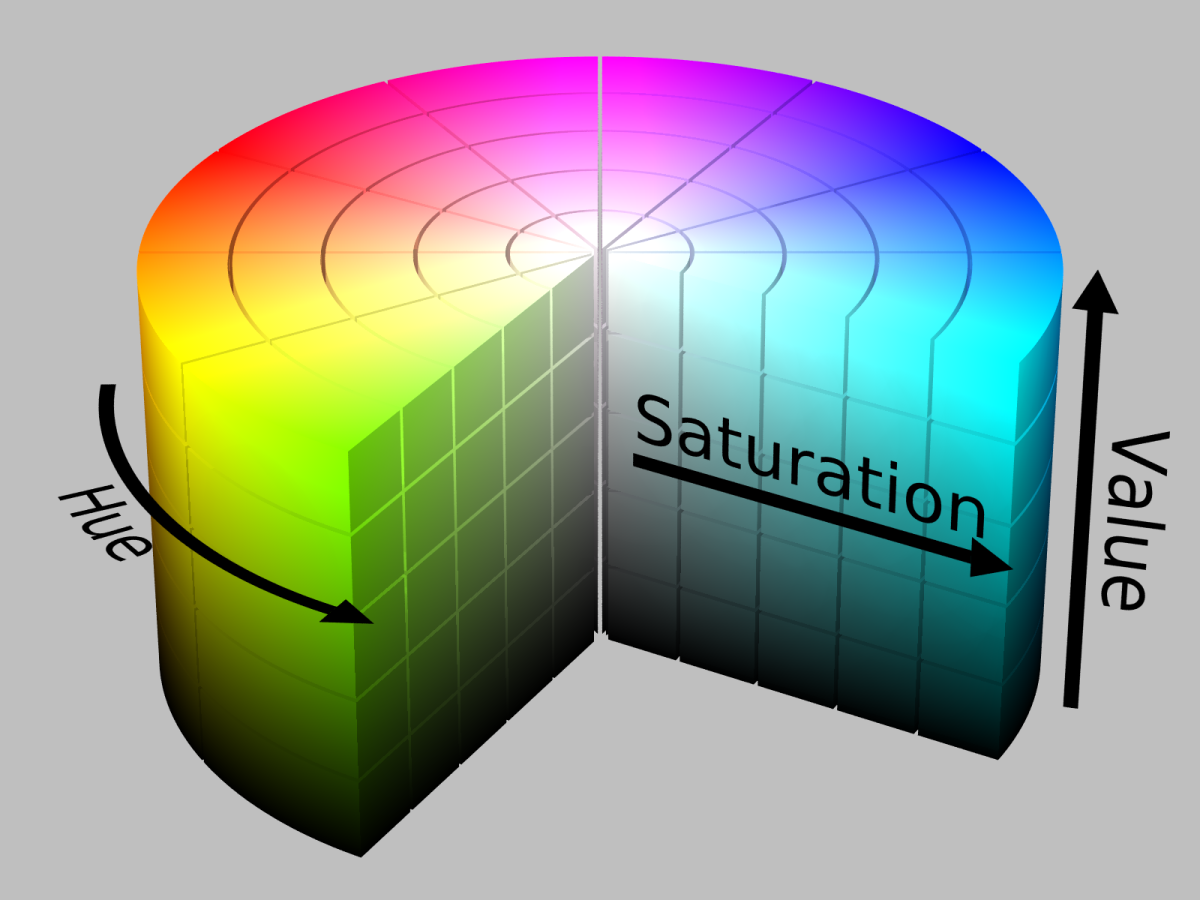

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Color Filtering Using OpenCV

This script filters a specific color (blue) from an image using OpenCV and the HSV color space. cv2.bitwise_and() requires two images of the same size, even if they are the same.

### **Steps:**
1. **Load the Image**: Reads an image using `cv2.imread()`.
2. **Convert to HSV**: Transforms the BGR image to HSV using `cv2.cvtColor()`.
3. **Define Color Range**: Sets lower and upper HSV bounds for blue.
4. **Create a Mask**: Uses `cv2.inRange()` to isolate pixels within the specified range.
5. **Apply the Mask**: Uses `cv2.bitwise_and()` to retain only the blue regions.
6. **Display Results**: Shows the original image, mask, and filtered output.


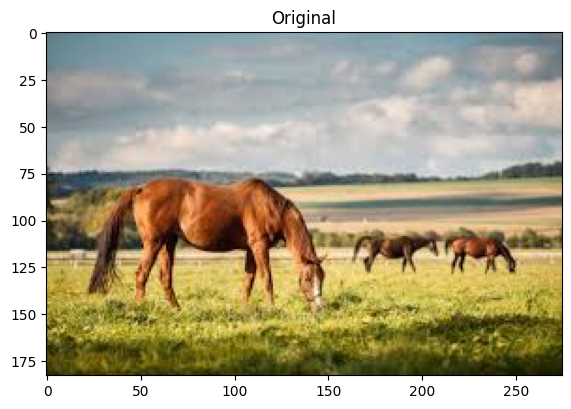

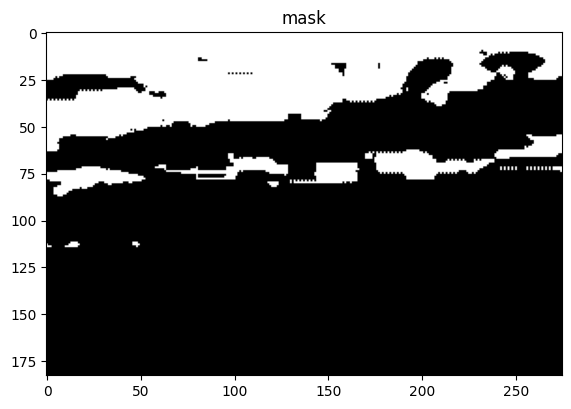

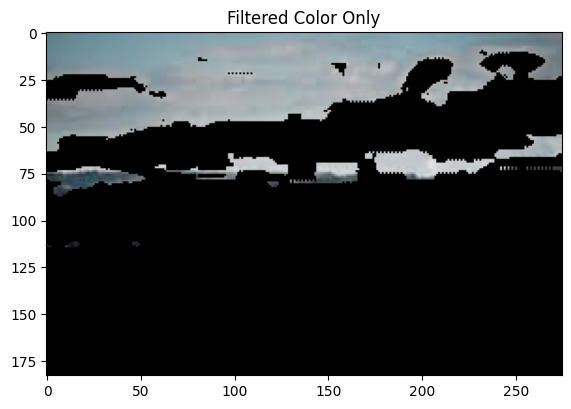

In [6]:
image = cv2.imread('horse.jpeg')

# define range of BLUE color in HSV
lower = np.array([90,0,0])
upper = np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper
mask = cv2.inRange(hsv_img, lower, upper)

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)
imshow('mask', mask)
imshow('Filtered Color Only', res)

#### **Filtering out Red**

- Why Two Ranges for Red? Red appears at both low (0-10) and high (170-180) HSV values.
-  Masking Method? We combine two masks for full red detection.
- Effect? Extracts only red-colored areas, making them stand out.


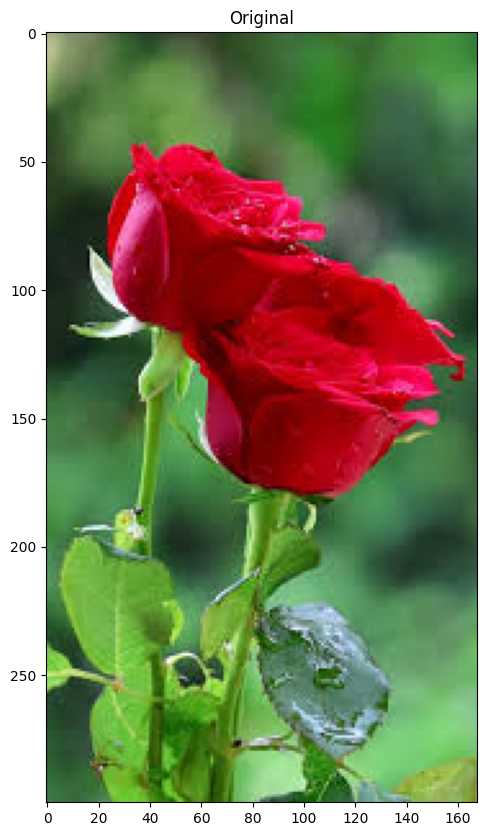

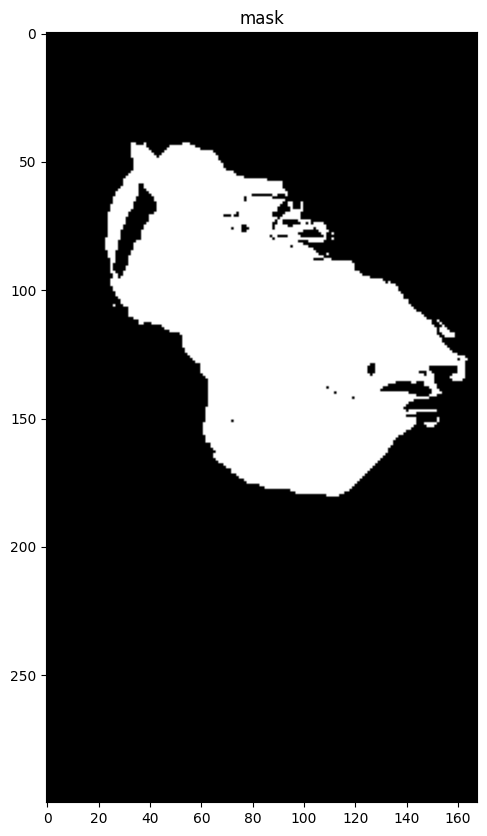

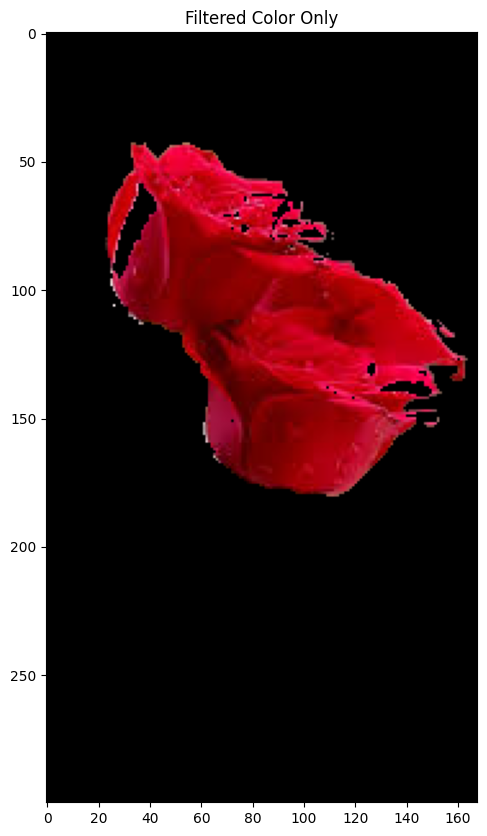

In [8]:
image = cv2.imread("rose.jpeg")

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,0,0])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join masks
mask = mask0+mask1

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)
imshow('mask', mask)
imshow('Filtered Color Only', res)